Epoch [1/500], Loss: 3340.1812
Epoch [101/500], Loss: 58.7444
Epoch [201/500], Loss: 58.7441
Epoch [301/500], Loss: 58.7439
Epoch [401/500], Loss: 58.7437
학습된 가중치 (Weight): 0.3644790053367615
학습된 편향 (Bias): -0.00040608717245049775


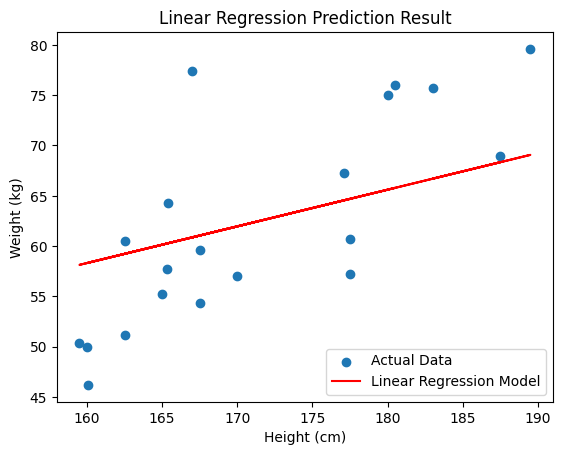

키: 160.00 cm, 실제 몸무게: 50.00 kg, 예측 몸무게: 58.32 kg
키: 162.50 cm, 실제 몸무게: 51.20 kg, 예측 몸무게: 59.23 kg
키: 165.00 cm, 실제 몸무게: 55.20 kg, 예측 몸무게: 60.14 kg
키: 167.50 cm, 실제 몸무게: 54.30 kg, 예측 몸무게: 61.05 kg
키: 170.00 cm, 실제 몸무게: 57.00 kg, 예측 몸무게: 61.96 kg
키: 159.50 cm, 실제 몸무게: 50.40 kg, 예측 몸무게: 58.13 kg
키: 165.30 cm, 실제 몸무게: 57.70 kg, 예측 몸무게: 60.25 kg
키: 177.50 cm, 실제 몸무게: 57.20 kg, 예측 몸무게: 64.69 kg
키: 180.00 cm, 실제 몸무게: 75.00 kg, 예측 몸무게: 65.61 kg
키: 189.50 cm, 실제 몸무게: 79.60 kg, 예측 몸무게: 69.07 kg
키: 183.00 cm, 실제 몸무게: 75.70 kg, 예측 몸무게: 66.70 kg
키: 187.50 cm, 실제 몸무게: 69.00 kg, 예측 몸무게: 68.34 kg
키: 160.10 cm, 실제 몸무게: 46.20 kg, 예측 몸무게: 58.35 kg
키: 177.50 cm, 실제 몸무게: 60.70 kg, 예측 몸무게: 64.69 kg
키: 167.00 cm, 실제 몸무게: 77.40 kg, 예측 몸무게: 60.87 kg
키: 180.50 cm, 실제 몸무게: 76.00 kg, 예측 몸무게: 65.79 kg
키: 177.10 cm, 실제 몸무게: 67.30 kg, 예측 몸무게: 64.55 kg
키: 162.50 cm, 실제 몸무게: 60.50 kg, 예측 몸무게: 59.23 kg
키: 165.40 cm, 실제 몸무게: 64.30 kg, 예측 몸무게: 60.28 kg
키: 167.50 cm, 실제 몸무게: 59.60 kg, 예측 몸무게: 61.05 kg


In [1]:
import numpy as np                  # 넘파이 import
import torch                        # 파이토치 import
import torch.nn as nn               # 인공신경망(Neural Network) 연산을 위해 import (Linear,Convolution, RNN 등)
import torch.optim as optim         # 모델 최적화하는데 필요한 최적화 함수(SGD ,ADAM, LBFGS) 사용을 위해 import
import torch.nn.init as init        # 텐서를 초기화하는 함수(uniform, normal, xavier 등등) 사용을 위해 import
import matplotlib.pyplot as plt     # 데이터나 학습 결과 출력하기 위해 사용




### 20개 이상의 키(x)에 따른 몸무게(y) 데이터를 바탕으로 선형회귀 모델 구현 ###
# 1. 데이터는 개별적으로 생성.
# 2. 손실 함수로 MSE loss 사용. ( torch.nn.MSELoss() )
# 3. 최적화 방법으로 Stochastic Gradient Descent 사용.




## 데이터 생성 ##

# 몸무게와 키 값을 리스트로 생성
desired_heights = [160.0, 162.5, 165.0, 167.5, 170.0, 159.5, 165.3, 177.5, 180.0, 189.5, 183.0, 187.5, 160.1, 177.5, 167.0, 180.5, 177.1, 162.5, 165.4, 167.5]
desired_weights = [50.0, 51.2, 55.2, 54.3, 57.0, 50.4, 57.7, 57.2, 75.0, 79.6, 75.7, 69.0, 46.2, 60.7, 77.4, 76.0, 67.3, 60.5, 64.3, 59.6]

# 데이터 -> 텐서 변환
heights_tensor = torch.tensor(desired_heights, dtype=torch.float32).view(-1, 1)
weights_tensor = torch.tensor(desired_weights, dtype=torch.float32).view(-1, 1)

num_epoch = 500   # 학습 횟수 지정



# 데이터 노이즈 추가
noise = torch.randn(heights_tensor.size()) * 0.2

heights_with_noise = heights_tensor + torch.randn(heights_tensor.size()) * 0.2
weights_with_noise = weights_tensor + torch.randn(weights_tensor.size()) * 0.2







## 선형 회귀 모델 정의 ##
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 차원 1, 출력 차원 1인 선형 레이어

    def forward(self, x):
      return self.linear(x)





## 모델, 손실 함수, 최적화 함수 설정 ##
# 모델 생성
model = LinearRegression()

# 모델 파라미터 초기화 (정규 분포 초기화 사용)
def init_weights(m):
    if type(m) == nn.Linear:
        init.normal_(m.weight, mean=0, std=0.1)
        m.bias.data.fill_(0.0)

model.apply(init_weights)


# 손실 함수와 최적화 함수 정의
criterion = nn.MSELoss()                             # MSE 손실 함수!!로 지정
optimizer = optim.SGD(model.parameters(), lr=0.00001)  # SGD 최적화 함수!! - 모델의 변수 전달, 학습률 0.01로 임의로 지정







## 학습 ##

for epoch in range(num_epoch):
    optimizer.zero_grad()
    outputs = model(heights_with_noise)

    loss = criterion(outputs, weights_with_noise)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}')






# 학습된 모델의 가중치 확인
print("학습된 가중치 (Weight):", model.linear.weight.item())
print("학습된 편향 (Bias):", model.linear.bias.item())

# 학습된 모델을 사용하여 예측
predicted_weights = model(heights_tensor.view(-1, 1)).detach().numpy()




## 학습 후 데이터와 모델 결과값 확인! ##
# 데이터와 예측값 시각화 - matplotlib의 scatter함수를 사용해 학습 데이터 확인
plt.scatter(desired_heights, desired_weights, label='Actual Data')
plt.plot(desired_heights, predicted_weights, label='Linear Regression Model', color='r')
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.title('Linear Regression Prediction Result')
plt.show()


# 입력값과 예측값 출력
for i in range(len(desired_weights)):
    print(f"키: {desired_heights[i]:.2f} cm, 실제 몸무게: {desired_weights[i]:.2f} kg, 예측 몸무게: {predicted_weights[i][0]:.2f} kg")
